## Association Rules MenuFood vs Other Factors

In [2]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
df = pd.read_csv('AssocRules_MenuFood.csv')
df

,IMAX,DBOX,4Dx,Premium,VIP,Outtakes,Bar,Lounge,Weekend,MenuFood,...,Stage Performance,Television Event,Adult,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31074,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
31075,0,0,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
31076,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,0
31077,0,1,1,0,0,1,1,0,1,1,...,0,0,1,0,0,0,1,0,0,0


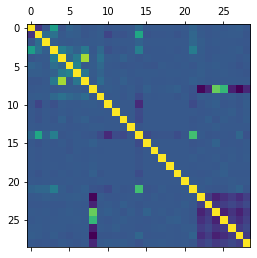

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

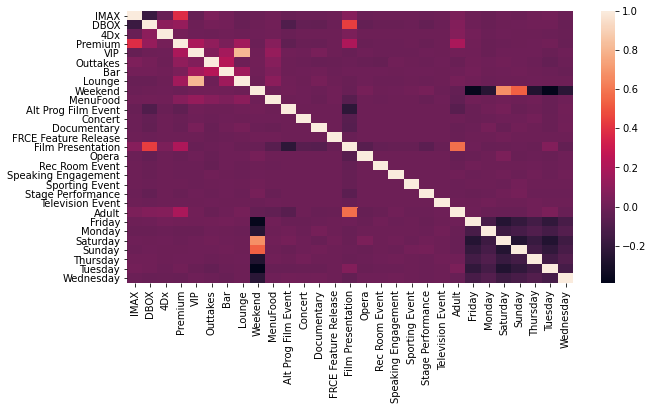

In [9]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

plt.figure(figsize=(10, 5))

import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Apriori Function

In [6]:
from mlxtend.frequent_patterns import apriori

freq_itemsets = apriori(df, min_support=0.05, use_colnames=True) #min support 5%

In [7]:
freq_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   479 non-null    float64
 1   itemsets  479 non-null    object 
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [8]:
freq_itemsets.head()

,support,itemsets
0,0.493066,(DBOX)
1,0.177129,(Premium)
2,0.207857,(VIP)
3,0.709804,(Outtakes)
4,0.543422,(Bar)


In [9]:
freq_itemsets.tail()

,support,itemsets
474,0.070626,"(MenuFood, Outtakes, Film Presentation, DBOX, ..."
475,0.059365,"(Outtakes, Film Presentation, DBOX, Adult, Wee..."
476,0.052222,"(Outtakes, Film Presentation, Bar, Adult, VIP,..."
477,0.050870,"(MenuFood, Outtakes, Film Presentation, Bar, A..."
478,0.067698,"(Outtakes, Film Presentation, Bar, Adult, Week..."


In [10]:
#sort by support values
freq_itemsets.sort_values(by=['support'], ascending=False).head() 

,support,itemsets
8,0.836674,(Film Presentation)
3,0.709804,(Outtakes)
9,0.657132,(Adult)
83,0.651726,"(Adult, Film Presentation)"
50,0.592651,"(Outtakes, Film Presentation)"


In [11]:
# itemset at this spot 
freq_itemsets.iloc[0,1] 

frozenset({'DBOX'})

In [12]:
# to see how many items in itemset 
len(freq_itemsets.iloc[17,1])

2

In [13]:
# add columns for length
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x: len(x))

In [14]:
freq_itemsets.head()

,support,itemsets,length
0,0.493066,(DBOX),1
1,0.177129,(Premium),1
2,0.207857,(VIP),1
3,0.709804,(Outtakes),1
4,0.543422,(Bar),1


### Querying Data

In [15]:
freq_itemsets[(freq_itemsets['support'] >= 0.2) & 
              (freq_itemsets['length'] > 1) & 
              (freq_itemsets['itemsets'].apply(lambda x: 'MenuFood' in x))].sort_values(by=['support'], ascending=False)

,support,itemsets,length
77,0.323756,"(MenuFood, Film Presentation)",2
49,0.303485,"(MenuFood, Outtakes)",2
78,0.254963,"(MenuFood, Adult)",2
249,0.253322,"(MenuFood, Adult, Film Presentation)",3
199,0.244731,"(MenuFood, Outtakes, Film Presentation)",3
61,0.231829,"(MenuFood, Bar)",2
23,0.201647,"(DBOX, MenuFood)",2
130,0.201647,"(DBOX, MenuFood, Film Presentation)",3


In [16]:
#search for item 
freq_itemsets[freq_itemsets['itemsets'] == {'MenuFood'}]

,support,itemsets,length
7,0.40233,(MenuFood),1


## Association Rules Function

In [17]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(freq_itemsets, min_threshold=0.5) #min confidence threshold

In [18]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1856 entries, 0 to 1855
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         1856 non-null   object 
 1   consequents         1856 non-null   object 
 2   antecedent support  1856 non-null   float64
 3   consequent support  1856 non-null   float64
 4   support             1856 non-null   float64
 5   confidence          1856 non-null   float64
 6   lift                1856 non-null   float64
 7   leverage            1856 non-null   float64
 8   conviction          1856 non-null   float64
dtypes: float64(7), object(2)
memory usage: 130.6+ KB


In [19]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Premium),(DBOX),0.177129,0.493066,0.112134,0.633061,1.283927,0.024797,1.381520
1,(DBOX),(Outtakes),0.493066,0.709804,0.355803,0.721613,1.016637,0.005823,1.042420
2,(Outtakes),(DBOX),0.709804,0.493066,0.355803,0.501269,1.016637,0.005823,1.016448
3,(DBOX),(Bar),0.493066,0.543422,0.272467,0.552597,1.016885,0.004524,1.020509
4,(Bar),(DBOX),0.543422,0.493066,0.272467,0.501391,1.016885,0.004524,1.016697


In [20]:
# add columns for antecedents length
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x)) 

In [21]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Premium),(DBOX),0.177129,0.493066,0.112134,0.633061,1.283927,0.024797,1.381520,1
1,(DBOX),(Outtakes),0.493066,0.709804,0.355803,0.721613,1.016637,0.005823,1.042420,1
2,(Outtakes),(DBOX),0.709804,0.493066,0.355803,0.501269,1.016637,0.005823,1.016448,1
3,(DBOX),(Bar),0.493066,0.543422,0.272467,0.552597,1.016885,0.004524,1.020509,1
4,(Bar),(DBOX),0.543422,0.493066,0.272467,0.501391,1.016885,0.004524,1.016697,1


### Querying Data

In [22]:
rules[#(rules['antecedent_len'] >= 2) &
      (rules['confidence'] > 0.5) &
      #(rules['lift'] > 2)&
      (rules['consequents'].apply(lambda x: 'MenuFood' in x))].sort_values(by=['confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
781,"(Outtakes, VIP, Bar)",(MenuFood),0.113614,0.402330,0.062068,0.546304,1.357852,0.016357,1.317337,3
215,"(Outtakes, VIP)",(MenuFood),0.158757,0.402330,0.085299,0.537292,1.335453,0.021426,1.291680,2
523,"(DBOX, VIP, Film Presentation)",(MenuFood),0.102095,0.402330,0.054764,0.536401,1.333238,0.013688,1.289197,3
91,"(DBOX, VIP)",(MenuFood),0.102095,0.402330,0.054764,0.536401,1.333238,0.013688,1.289197,2
525,"(DBOX, VIP)","(MenuFood, Film Presentation)",0.102095,0.323756,0.054764,0.536401,1.656808,0.021710,1.458684,2
1497,"(Outtakes, Bar, VIP, Film Presentation)",(MenuFood),0.094147,0.402330,0.050452,0.535885,1.331956,0.012574,1.287764,4
802,"(Outtakes, VIP, Lounge)",(MenuFood),0.116574,0.402330,0.062035,0.532156,1.322686,0.015134,1.277499,3
1534,"(Outtakes, Adult, VIP, Film Presentation)",(MenuFood),0.102770,0.402330,0.054313,0.528491,1.313577,0.012966,1.267569,4
831,"(Outtakes, Adult, VIP)",(MenuFood),0.103703,0.402330,0.054538,0.525908,1.307156,0.012815,1.260662,3
827,"(Outtakes, VIP, Film Presentation)",(MenuFood),0.129283,0.402330,0.067956,0.525635,1.306478,0.015941,1.259937,3


In [23]:
rules[#(rules['antecedent_len'] >= 2) &
      #(rules['confidence'] > 0.50) &
      #(rules['lift'] > 1)&
      (rules['consequents'].apply(lambda x: 'MenuFood' in x))].sort_values(by=['support'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
19,(VIP),(MenuFood),0.207857,0.402330,0.108916,0.523994,1.302400,0.025289,1.255594,1
49,(Lounge),(MenuFood),0.183886,0.402330,0.092345,0.502187,1.248199,0.018362,1.200593,1
254,"(VIP, Film Presentation)",(MenuFood),0.171241,0.402330,0.087776,0.512589,1.274053,0.018881,1.226215,2
238,"(VIP, Lounge)",(MenuFood),0.165675,0.402330,0.085653,0.516994,1.285000,0.018997,1.237397,2
215,"(Outtakes, VIP)",(MenuFood),0.158757,0.402330,0.085299,0.537292,1.335453,0.021426,1.291680,2
228,"(VIP, Bar)",(MenuFood),0.148332,0.402330,0.077576,0.522993,1.299913,0.017898,1.252961,2
256,"(Adult, VIP)",(MenuFood),0.139129,0.402330,0.071302,0.512488,1.273803,0.015326,1.225962,2
914,"(Adult, VIP)","(MenuFood, Film Presentation)",0.139129,0.323756,0.070884,0.509482,1.573662,0.025840,1.378633,2
912,"(Adult, VIP, Film Presentation)",(MenuFood),0.137488,0.402330,0.070884,0.515563,1.281444,0.015568,1.233742,3
886,"(Film Presentation, VIP, Lounge)",(MenuFood),0.137424,0.402330,0.068953,0.501756,1.247127,0.013664,1.199554,3


In [25]:
rules.to_excel('Rules2.xlsx', sheet_name='Sheet2', index = False)
freq_itemsets.to_excel('Apriori2.xlsx', sheet_name='Sheet1', index = False)